## 4. Representing Data and Engineering Features

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import introduction_to_ml_with_python.mglearn as mglearn

%matplotlib inline
%reload_ext autoreload

%autoreload 2

In [21]:

# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
adult_path = os.path.join(mglearn.datasets.DATA_PATH, "adult.data")

data = pd.read_csv(
    adult_path, header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education',  'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'gender',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income'])
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

# IPython.display allows nice output formatting within the Jupyter notebook
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [22]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [23]:
print("Original features:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [24]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [25]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays

X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44)  y.shape: (32561,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


### Binning, Discretization, Linear Models, and Trees

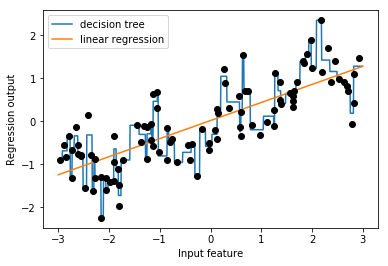

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)


reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

plt.plot(line, reg.predict(line), label="decision tree")


reg = LinearRegression().fit(X, y)

plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [18]:
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [19]:
y[:10]

array([-0.39794858,  0.71057755,  0.41392867, -0.34838379, -1.60200406,
       -1.31357099, -0.124268  ,  1.13660585,  0.22684365, -0.10700113])

In [21]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [22]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


What we did here is transform the single continuous input feature in the wave dataset into a categorical feature that encodes which bin a data point is in.

-0.75275929 = >  between [-1.2 -0.6] so 4th data points

In [23]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)

# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [24]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


Now we build a new linear regression model and a new decision tree model on the one-hot-encoded data.

Text(0.5,0,'Input feature')

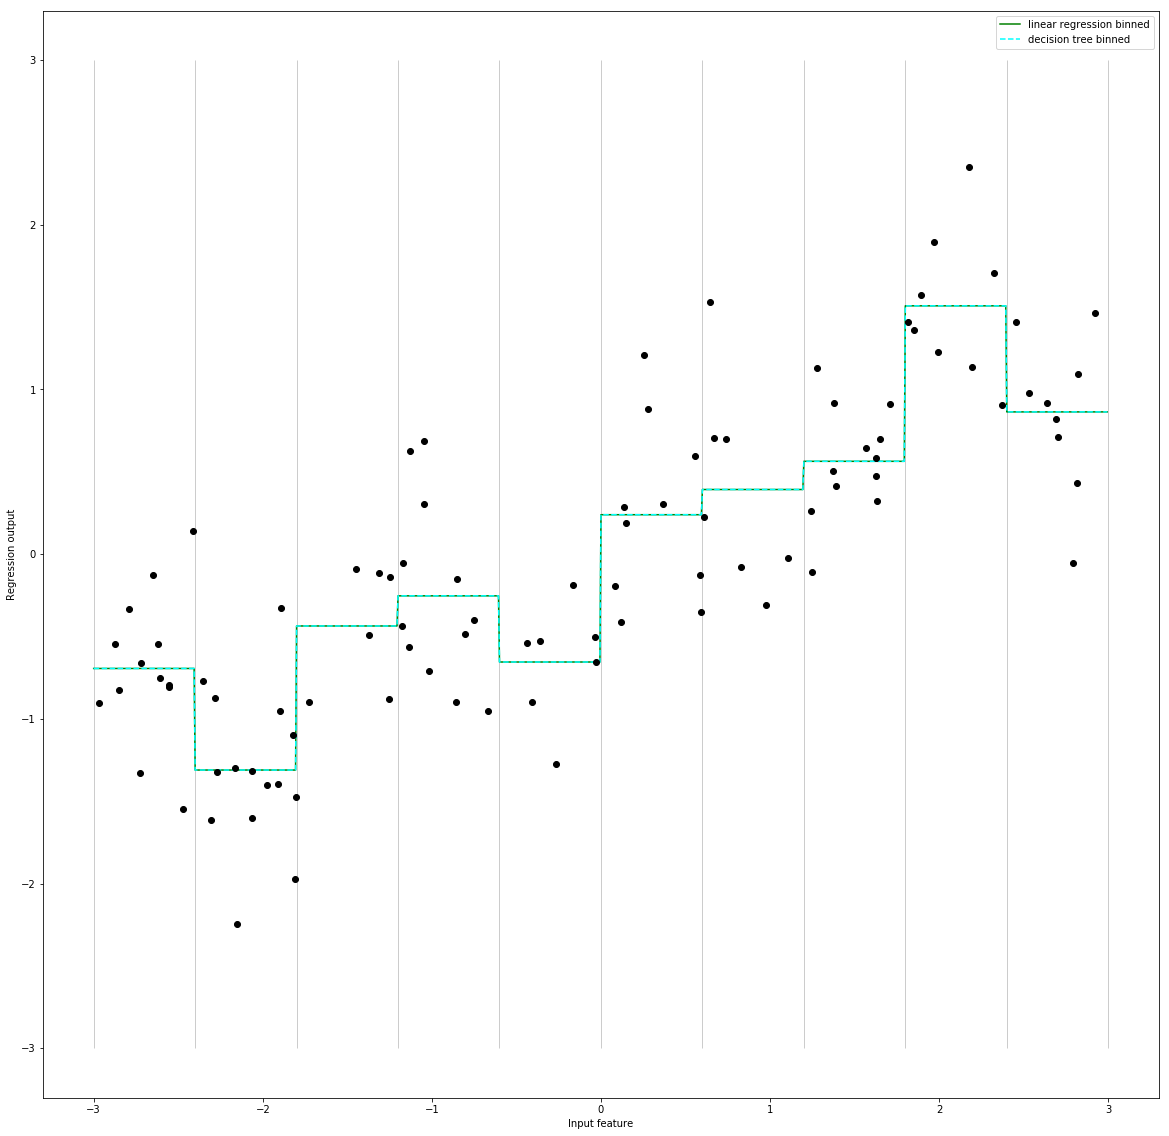

In [40]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

plt.subplots(figsize=(20,20))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), c='green', label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', c='cyan', label='decision tree binned')

plt.plot(X[:, 0], y, 'o', c='k')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)


plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

The dashed line and solid line are exactly on top of each other, meaning the linear regression model and the decision tree make exactly the same predictions.

### Interactions and Polynomials

In [41]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


In [42]:
X_combined[:10]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06403288,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

In [43]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])

In [44]:
line_binned.shape

(1000, 10)

In [45]:
line_binned[:10]

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

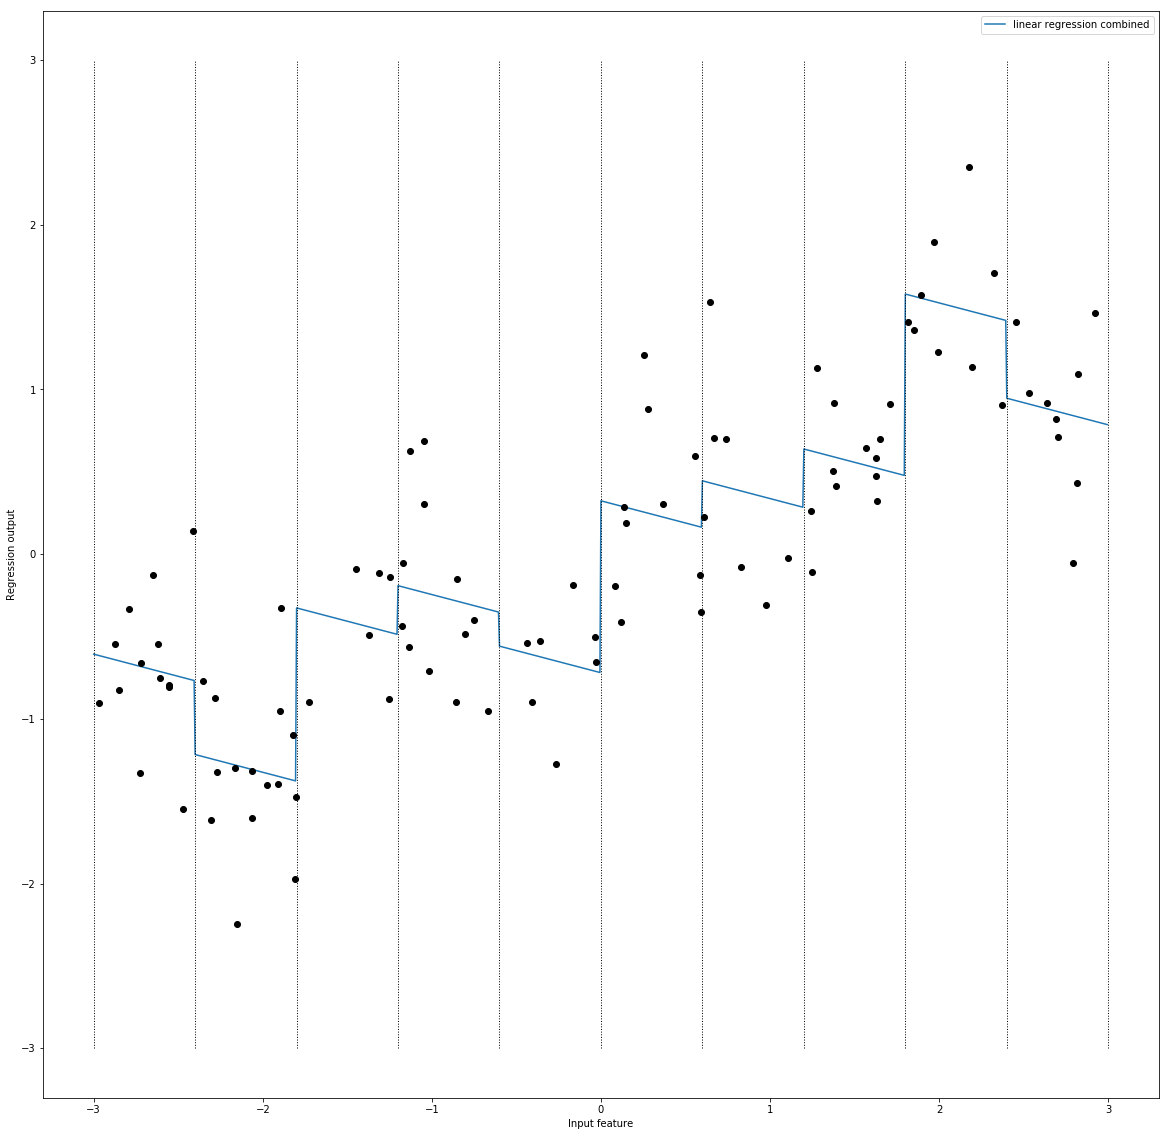

In [47]:
plt.subplots(figsize=(20,20))

plt.plot(line, reg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)
    
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')
# Linear regression using binned features and a single global slope
# In this example, the model learned an offset for each bin, together with a slope.

In [48]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


In [49]:
X_product[:10]

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  2.70428584],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.39196365,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  

The dataset now has 20 features

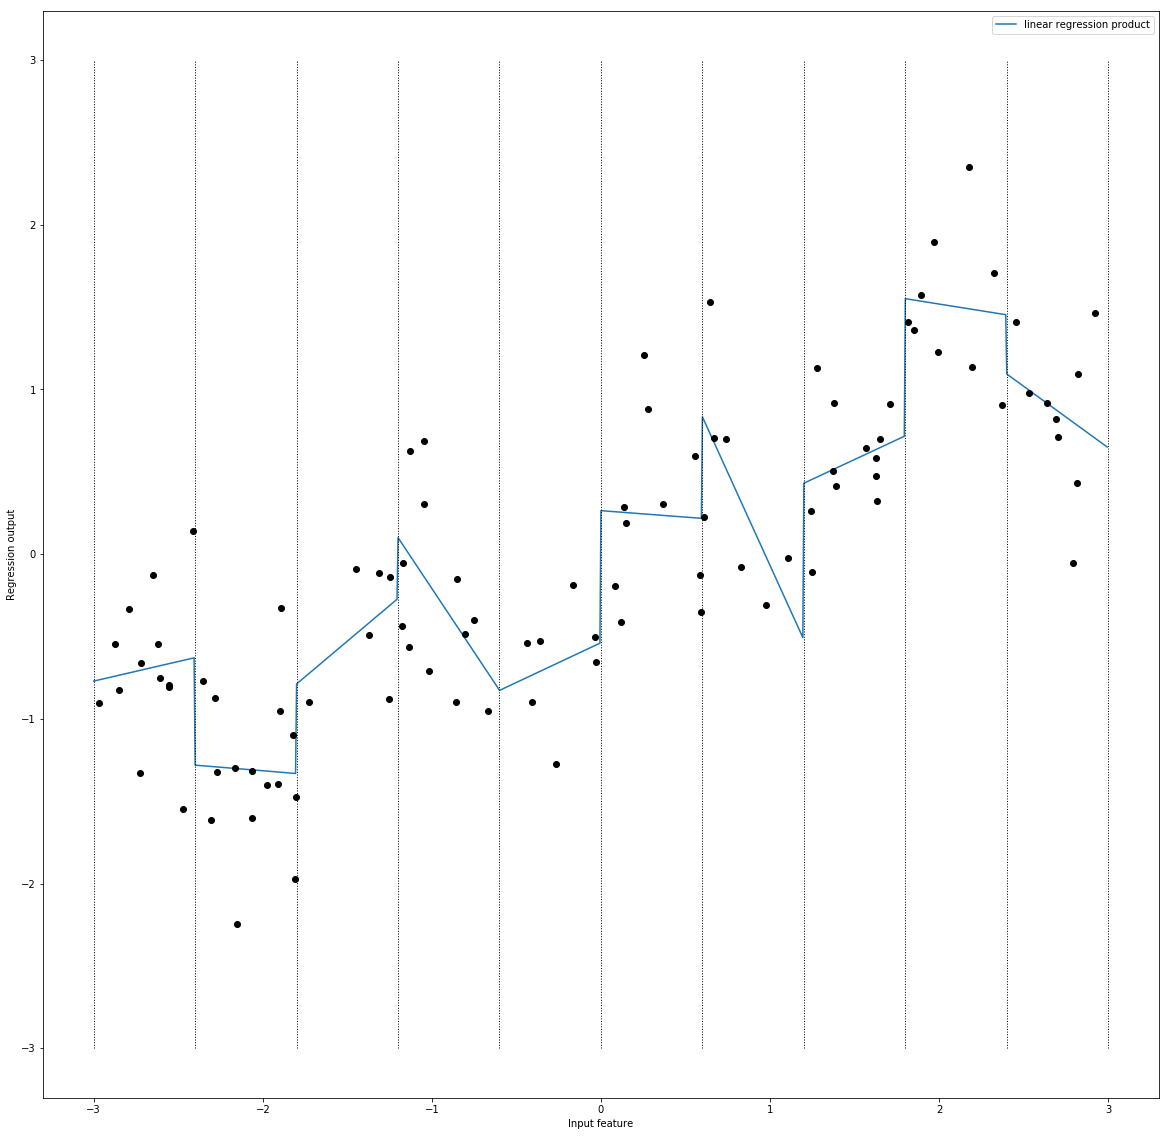

In [51]:
plt.subplots(figsize=(20,20))

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [52]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

Using a degree of 10 yields 10 features:

In [53]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [54]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [55]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


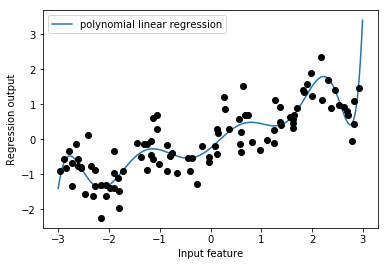

In [56]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

As you can see, polynomial features yield a very smooth fit on this one-dimensional data.

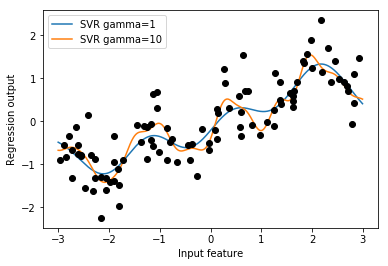

In [57]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Comparison of different gamma parameters for an SVM with RBF kernel

In [58]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [60]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [63]:
X_train_poly[:10]

array([[  1.00000000e+00,   2.07946779e-03,   2.20000000e-01, ...,
          9.61198835e-01,   4.65311126e-01,   2.25254585e-01],
       [  1.00000000e+00,   1.08980702e-03,   2.50000000e-01, ...,
          1.00000000e+00,   2.12482270e-01,   4.51487149e-02],
       [  1.00000000e+00,   1.10565508e-03,   4.00000000e-01, ...,
          9.61792244e-01,   1.20189149e-01,   1.50192847e-02],
       ..., 
       [  1.00000000e+00,   1.32696369e-01,   0.00000000e+00, ...,
          1.47288930e-02,   7.23355827e-02,   3.55249816e-01],
       [  1.00000000e+00,   7.63179629e-05,   9.00000000e-01, ...,
          9.95114157e-01,   8.71621727e-02,   7.63454555e-03],
       [  1.00000000e+00,   3.64314305e-03,   0.00000000e+00, ...,
          9.00962756e-01,   2.46385640e-01,   6.73789045e-02]])

The first new feature is a constant feature, called "1" here. The next 13 features are the original features (called "x0" to "x12"). Then follows the first feature squared ("x0^2") and combinations of the first and the other features.

In [61]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in performance when using Ridge.

In [62]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.812
Score with interactions: 0.762


You can see that even without additional features, the random forest beats the performance of Ridge. Adding interactions and polynomials actually decreases performance slightly.

### Univariate Nonlinear Transformations

In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [32]:
X

array([[56, 18, 27],
       [81, 57,  3],
       [25,  9, 11],
       ..., 
       [ 2, 16, 16],
       [ 7, 76,  4],
       [ 7,  3,  8]])

In [33]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9 17
  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5  2  1
  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1  0  2  0
  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0  0  0  0  0
  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [34]:
y[:10]

array([ 2.92614361,  4.74436373,  1.4394878 ,  0.56962109,  1.23092405,
        1.4048387 ,  0.30534339,  1.61798577,  2.78397106,  0.40526824])

In [35]:
range(len(bins))

range(0, 141)

In [36]:
bins = np.bincount(X[:, 0])

In [38]:
bins

array([28, 38, 68, 48, 61, 59, 45, 56, 37, 40, 35, 34, 36, 26, 23, 26, 27,
       21, 23, 23, 18, 21, 10,  9, 17,  9,  7, 14, 12,  7,  3,  8,  4,  5,
        5,  3,  4,  2,  4,  1,  1,  3,  2,  5,  3,  8,  2,  5,  2,  1,  2,
        3,  3,  2,  2,  3,  3,  0,  1,  2,  1,  0,  0,  3,  1,  0,  0,  0,
        1,  3,  0,  1,  0,  2,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  2,
        2,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1])

Text(0.5,0,'Value')

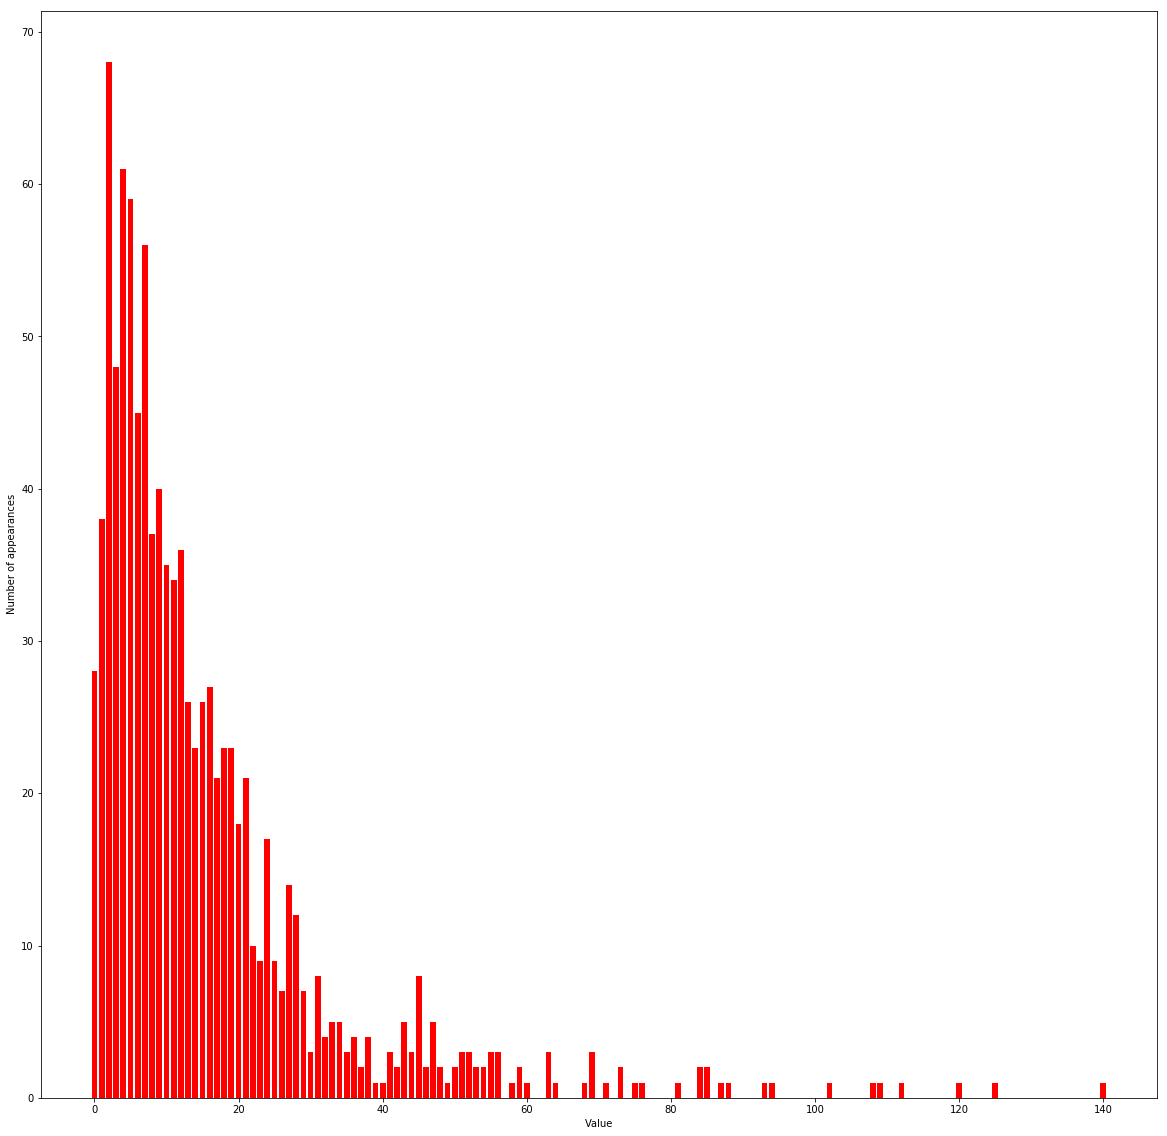

In [42]:
fig, ax = plt.subplots(figsize=(20,20))

ax.bar(np.arange(len(bins)), bins, color='r')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [28]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

score = Ridge().fit(X_train, y_train).score(X_test, y_test)

print("Test score: {:.3f}".format(score))

Test score: 0.620


In [46]:
X_train

array([[ 0.28026168],
       [-2.65149833],
       [-2.35265144],
       [-1.01461185],
       [ 1.62762208],
       [-0.66793626],
       [ 2.17862056],
       [-2.28243452],
       [-2.55269614],
       [ 1.65079694],
       [ 0.08540663],
       [-0.40832989],
       [-2.46904499],
       [-0.85948004],
       [ 1.24114406],
       [ 2.70428584],
       [-1.37190581],
       [-2.79366887],
       [-0.02893854],
       [-2.06388816],
       [-1.89957294],
       [ 0.14853859],
       [-2.26777059],
       [ 1.10539816],
       [-2.06403288],
       [ 1.27946872],
       [-1.04801802],
       [-0.75275929],
       [ 2.7937922 ],
       [ 0.55448741],
       [ 2.81750777],
       [ 2.81945911],
       [ 1.85038409],
       [-0.80182894],
       [ 2.63699365],
       [-2.87649303],
       [-1.97685526],
       [-2.15445465],
       [-1.82410283],
       [-2.30478564],
       [-1.04890007],
       [-2.60969044],
       [-1.13410607],
       [-1.9090502 ],
       [-0.16671045],
       [-1

In [47]:
X_test

array([[-1.80195731],
       [ 1.37763707],
       [ 1.39196365],
       [ 2.53124541],
       [ 1.37404301],
       [ 0.36766319],
       [-1.17454654],
       [ 1.89276857],
       [ 0.58739987],
       [-0.03722642],
       [ 2.3689641 ],
       [ 1.56471029],
       [-0.84920563],
       [-1.72596534],
       [ 2.19705687],
       [ 0.64526911],
       [-1.24713211],
       [-0.26358009],
       [ 2.69331322],
       [ 0.60669007],
       [ 2.45592241],
       [ 1.97242505],
       [ 0.59195091],
       [-1.80770591],
       [ 0.97513371]])

In [52]:
X_train_log = np.log(X_train + 3)
X_test_log = np.log(X_test + 2)

In [53]:
X_train_log

array([[ 1.1879232 ],
       [-1.05411225],
       [-0.43487039],
       [ 0.68581444],
       [ 1.53204315],
       [ 0.8467536 ],
       [ 1.64453872],
       [-0.33189108],
       [-0.80451713],
       [ 1.53703859],
       [ 1.12668346],
       [ 0.9523025 ],
       [-0.63307798],
       [ 0.76104877],
       [ 1.44483306],
       [ 1.74121779],
       [ 0.48741012],
       [-1.57827299],
       [ 1.08891928],
       [-0.06602032],
       [ 0.09569834],
       [ 1.14693841],
       [-0.31166141],
       [ 1.41230273],
       [-0.06617493],
       [ 1.45382887],
       [ 0.66884526],
       [ 0.80970311],
       [ 1.75678703],
       [ 1.26821087],
       [ 1.76087195],
       [ 1.76120732],
       [ 1.5790579 ],
       [ 0.78762568],
       [ 1.72935088],
       [-2.09145772],
       [ 0.02288096],
       [-0.16777348],
       [ 0.16203141],
       [-0.36353505],
       [ 0.66839328],
       [-0.94081512],
       [ 0.62374026],
       [ 0.0870487 ],
       [ 1.04143842],
       [ 0

In [54]:
X_test_log

array([[-1.61927265],
       [ 1.21717637],
       [ 1.221409  ],
       [ 1.51099683],
       [ 1.21611173],
       [ 0.86190347],
       [-0.1918224 ],
       [ 1.35912062],
       [ 0.95065346],
       [ 0.67435856],
       [ 1.47452593],
       [ 1.27108279],
       [ 0.14045246],
       [-1.29450067],
       [ 1.43438354],
       [ 0.9727728 ],
       [-0.28386551],
       [ 0.55182547],
       [ 1.54613878],
       [ 0.95808124],
       [ 1.49423409],
       [ 1.37937675],
       [ 0.95241084],
       [-1.64872936],
       [ 1.09028898]])

Text(0.5,0,'Value')

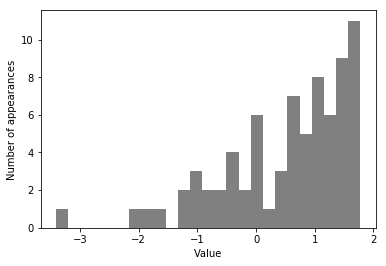

In [56]:
plt.hist(X_train_log[:, 0], bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [55]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.480


## Automatic Feature Selection

### Univariate Statistics

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [58]:
# get deterministic random numbers
rng = np.random.RandomState(42)

noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

In [60]:
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)

select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


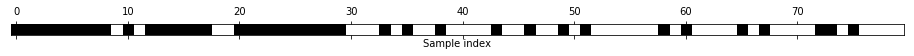

In [69]:
mask = select.get_support()
print(mask)

# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

plt.xlabel("Sample index")
plt.yticks(());

In [63]:
mask.shape

(80,)

In [62]:
mask.reshape(1, -1).shape

(1, 80)

In [70]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()

# !! X_train
lr.fit(X_train, y_train)

print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 

# !!!! X_train_selected
lr.fit(X_train_selected, y_train)

print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


In this case, removing the noise features improved performance, even though some of the original features were lost. 

### Model-Based Feature Selection

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones.

In contrast to univariate selection, model-based selection considers all features at once, and so can capture interactions (if the model can capture them). 

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
# We use a random forest classifier with 100 trees to compute the feature importances.

The SelectFromModel class selects all features that have an importance measure of the feature (as provided by the supervised model) greater than the provided threshold.

In [73]:
select.fit(X_train, y_train)

X_train_l1 = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([], <a list of 0 Text yticklabel objects>)

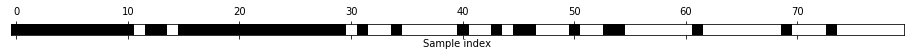

In [74]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [78]:
X_test_l1 = select.transform(X_test)


In [79]:
X_train_l1.shape

(284, 40)

In [80]:
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)

print("Test score: {:.3f}".format(score))

Test score: 0.951


With the better feature selection, we also gained some improvements here.

### Iterative Feature Selection

In univariate testing we used **no model**, while in model-based selection we used **a single model** to select features. In iterative feature selection, **a series of models** are built, with varying numbers of features.

There are two basic methods: starting with no features and adding features one by one until some stopping criterion is reached, or starting with all features and removing features one by one until some stopping criterion is reached

In [81]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
  n_features_to_select=40, step=1, verbose=0)

([], <a list of 0 Text yticklabel objects>)

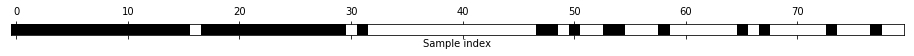

In [82]:

# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

In [83]:
mask.shape

(80,)

In [84]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.951


In [85]:
X_train_rfe.shape

(284, 40)

In [86]:
X_test_rfe.shape

(285, 40)

In [89]:
y_test.shape

(285,)

In [87]:
X_test.shape

(285, 80)

In [88]:
# random forest
print("Test score: {:.3f}".format(select.score(X_test, y_test)))

Test score: 0.951


the performance of the random forest used inside the RFE is the same as that achieved by training a logistic regression model on top of the selected features

## Utilizing Expert Knowledge

Adding a feature does not force a machine learning algorithm to use it, and even if the holiday information turns out to be noninformative for flight prices, augmenting the data with this information doesn’t hurt.

In [90]:
citibike = mglearn.datasets.load_citibike()

In [92]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0,0.5,'Rentals')

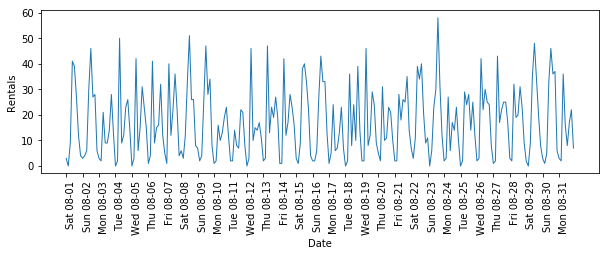

In [93]:
plt.figure(figsize=(10, 3))

plt.plot(citibike, linewidth=1)

xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')

plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")

plt.xlabel("Date")
plt.ylabel("Rentals")

In [94]:
# extract the target values (number of rentals)
y = citibike.values

# convert to POSIX time by dividing by 10**9
X = citibike.index.astype("int64").values.reshape(-1, 1) // 10**9

In [96]:
X[:10]

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400],
       [1438441200],
       [1438452000],
       [1438462800],
       [1438473600],
       [1438484400]])

In [97]:
y[:10]

array([ 3,  0,  9, 41, 39, 27, 12,  4,  3,  4])

In [101]:
# use the first 184 data points for training, and the rest for testing
n_train = 184

# function to evaluate and plot a regressor on a given feature set
def eval_on_features(features, target, regressor):
    # split the given features into a training and a test set
    X_train, X_test = features[:n_train], features[n_train:]
    # also split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="prediction test")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")
    
    return y_pred

Test-set R^2: -0.04


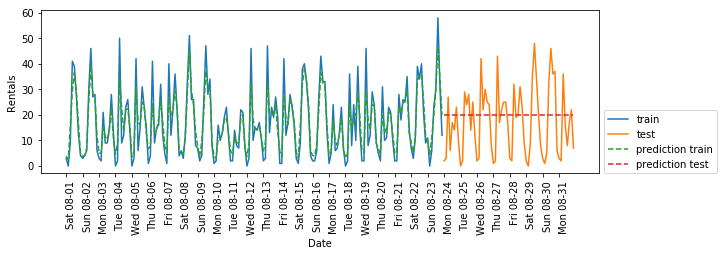

In [102]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
y_pred = eval_on_features(X, y, regressor)

The R2 is –0.04, which means that we learned nothing.

In [103]:
y_pred

array([ 19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,
        19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94,  19.94])

The problem lies in the combination of our feature and the random forest.

let’s use only the hour of the day.

In [106]:
citibike.index.hour.values

array([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,
        3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
        6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,
        9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9,
       12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12,
       15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15,
       18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18,
       21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,
        0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,
        3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
        6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,
        9, 12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9,
       12, 15, 18, 21,  0,  3,  6,  9, 12, 15, 18, 21,  0,  3,  6,  9, 12,
       15, 18, 21,  0,  3

Test-set R^2: 0.60


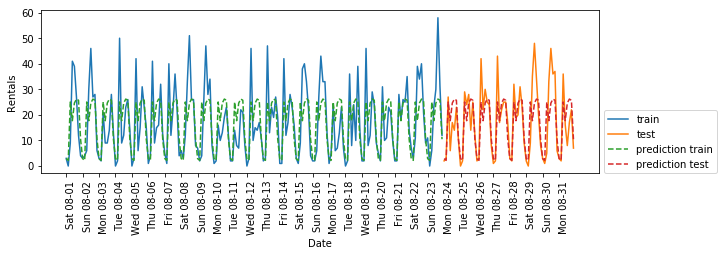

In [104]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
y_pred = eval_on_features(X_hour, y, regressor)

In [105]:
y_pred

array([  2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48889716,
         2.87927874,   2.21533132,  25.04906451,  17.72869671,
        24.62470677,  26.18953135,  25.72498513,  10.48

The R2 is already much better, but the predictions clearly miss the weekly pattern.

In [107]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
X_hour_week.shape

(248, 2)

In [109]:
X_hour_week[:10]

array([[ 5,  0],
       [ 5,  3],
       [ 5,  6],
       [ 5,  9],
       [ 5, 12],
       [ 5, 15],
       [ 5, 18],
       [ 5, 21],
       [ 6,  0],
       [ 6,  3]])

Test-set R^2: 0.84


array([  1.69752381,   3.16625   ,  21.02632937,   8.28490476,
         9.86333333,  15.34019048,  24.20571429,  10.81585714,
         0.6817619 ,   2.062     ,  32.68249206,   8.3087381 ,
        13.9702381 ,  18.75520635,  28.12795238,  11.6557619 ,
         0.68883333,   2.63436905,  43.5627619 ,   8.92080952,
        14.22092857,  23.37803571,  21.509     ,  11.63688095,
         2.56796429,   2.93946032,  39.99435714,  10.54183333,
        16.88390476,  19.04035714,  25.81382143,  13.43134524,
         2.58917857,   1.38903175,  36.76494444,  14.0585    ,
        22.20509524,  29.08954762,  27.16765476,  11.68550794,
         4.68467063,   1.78104762,  10.10179365,  37.24180303,
        41.04005159,  32.1085    ,  20.65772222,   6.35988095,
         5.62822727,   2.01969264,   5.55544444,  26.02367857,
        40.71812698,  35.58680159,  31.0388373 ,  10.04329365,
         1.69752381,   3.16625   ,  21.02632937,   8.28490476,
         9.86333333,  15.34019048,  24.20571429,  10.81

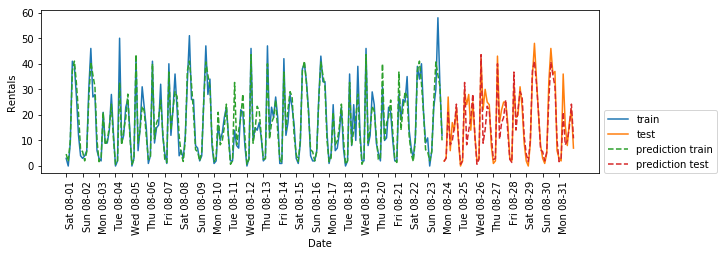

In [110]:
pred = eval_on_features(X_hour_week, y, regressor)
pred

Now we have a model that captures the periodic behavior by considering the day of week and time of day. It has an R2 of 0.84, and shows pretty good predictive performance.

Test-set R^2: 0.13


array([  5.35623366,   7.47786927,   9.59950488,  11.72114049,
        13.8427761 ,  15.96441171,  18.08604732,  20.20768293,
         6.61150338,   8.73313899,  10.8547746 ,  12.97641021,
        15.09804582,  17.21968143,  19.34131704,  21.46295265,
         7.8667731 ,   9.98840871,  12.11004432,  14.23167993,
        16.35331554,  18.47495115,  20.59658676,  22.71822237,
         9.12204281,  11.24367843,  13.36531404,  15.48694965,
        17.60858526,  19.73022087,  21.85185648,  23.97349209,
        10.37731253,  12.49894814,  14.62058376,  16.74221937,
        18.86385498,  20.98549059,  23.1071262 ,  25.22876181,
        11.63258225,  13.75421786,  15.87585347,  17.99748908,
        20.1191247 ,  22.24076031,  24.36239592,  26.48403153,
        12.88785197,  15.00948758,  17.13112319,  19.2527588 ,
        21.37439441,  23.49603003,  25.61766564,  27.73930125,
         5.35623366,   7.47786927,   9.59950488,  11.72114049,
        13.8427761 ,  15.96441171,  18.08604732,  20.20

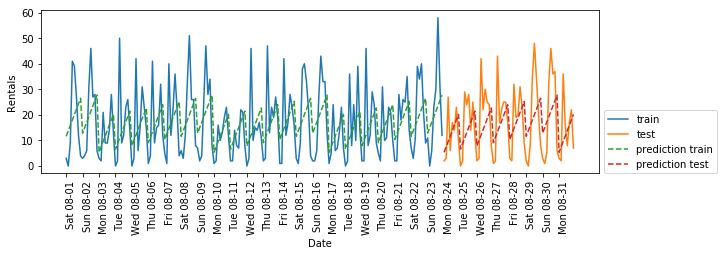

In [111]:
from sklearn.linear_model import LinearRegression

y_pred_test = eval_on_features(X_hour_week, y, LinearRegression())
y_pred_test

LinearRegression works much worse, and the periodic pattern looks odd. The reason for this is that we encoded day of week and time of day using integers, which are interpreted as continuous variables.

We can capture this by interpreting the integers as categorical variables, by transforming them using OneHotEncoder

In [115]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
X_hour_week_onehot.shape

(248, 15)

In [119]:
X_hour_week_onehot[:10,:]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.]])

Test-set R^2: 0.62


array([ -1.42528327,  -2.09194994,  20.24138339,  12.65805006,
        19.03305006,  20.53305006,  20.40805006,   5.86638339,
         1.45471673,   0.78805006,  23.12138339,  15.53805006,
        21.91305006,  23.41305006,  23.28805006,   8.74638339,
         2.65471673,   1.98805006,  24.32138339,  16.73805006,
        23.11305006,  24.61305006,  24.48805006,   9.94638339,
         3.17471673,   2.50805006,  24.84138339,  17.25805006,
        23.63305006,  25.13305006,  25.00805006,  10.46638339,
         4.61471673,   3.94805006,  26.28138339,  18.69805006,
        25.07305006,  26.57305006,  26.44805006,  11.90638339,
         5.78008843,   5.11342176,  27.4467551 ,  19.86342176,
        26.23842176,  27.73842176,  27.61342176,  13.0717551 ,
         6.4467551 ,   5.78008843,  28.11342176,  20.53008843,
        26.90508843,  28.40508843,  28.28008843,  13.73842176,
        -1.42528327,  -2.09194994,  20.24138339,  12.65805006,
        19.03305006,  20.53305006,  20.40805006,   5.86

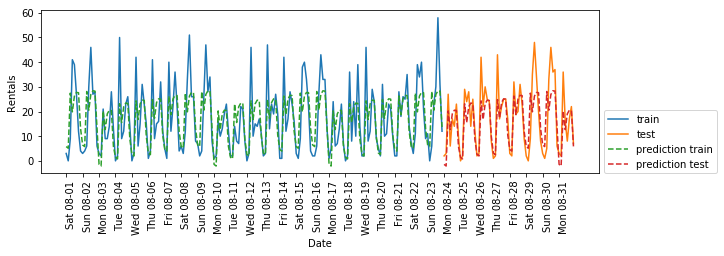

In [120]:
pred_y_test = eval_on_features(X_hour_week_onehot, y, Ridge())
pred_y_test

In [122]:
from sklearn.preprocessing import PolynomialFeatures

# # include polynomials up to x ** 2:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)

X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)

In [124]:
X_hour_week_onehot_poly.shape

(248, 120)

Test-set R^2: 0.85


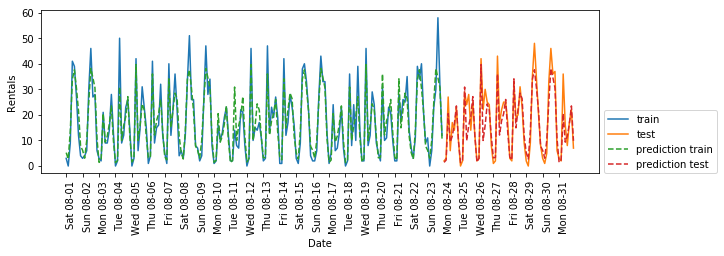

In [125]:
lr = Ridge()
pred_y_test = eval_on_features(X_hour_week_onehot_poly, y, lr)

In [127]:
y[n_train:]

array([ 2,  3, 27,  6, 17, 14, 23, 10,  0,  2, 29, 24, 28, 14, 25, 12,  2,
        3, 42, 22, 30, 25, 24,  8,  1,  2, 43, 17, 22, 25, 25, 17,  3,  2,
       32, 19, 20, 31, 23,  9,  2,  0,  9, 35, 48, 34, 20,  8,  3,  1,  5,
       33, 46, 36, 37,  6,  3,  2, 36, 16,  8, 17, 22,  7])

In [126]:
pred_y_test

array([  1.42724423,   2.32291352,  20.50401589,   9.33078754,
        11.69299226,  16.4114962 ,  23.5099214 ,   9.85637809,
         1.32010137,   2.21577067,  30.89687303,   9.97364468,
        15.83584941,  19.30435334,  27.15277854,  11.49923523,
         1.58795852,   2.98362781,  39.66473017,   9.99150182,
        15.85370655,  24.32221049,  21.92063568,  11.51709238,
         3.20402995,   3.34969924,  36.0308016 ,  12.10757325,
        17.71977798,  20.43828191,  26.03670711,  13.1331638 ,
         3.52545852,   2.42112781,  34.10223017,  14.92900182,
        22.04120655,  28.50971049,  26.35813568,  11.70459238,
         5.22798053,   2.74451596,  13.68939785,  33.95081517,
        37.64057895,  30.4153821 ,  21.49412226,   7.77128761,
         6.14689944,   3.06343488,  10.00831677,  25.06973409,
        38.15949787,  34.53430102,  30.61304118,  10.69020653,
         1.42724423,   2.32291352,  20.50401589,   9.33078754,
        11.69299226,  16.4114962 ,  23.5099214 ,   9.85

This transformation finally yields a model that performs similarly well to the random forest. 


**A big benefit of this model is that it is very clear what is learned: one coefficient for each day and time.**

In [128]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features =  day + hour

In [129]:
features

['Mon',
 'Tue',
 'Wed',
 'Thu',
 'Fri',
 'Sat',
 'Sun',
 '00:00',
 '03:00',
 '06:00',
 '09:00',
 '12:00',
 '15:00',
 '18:00',
 '21:00']

In [130]:
features_poly = poly_transformer.get_feature_names(features)

features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

Text(0,0.5,'Feature magnitude')

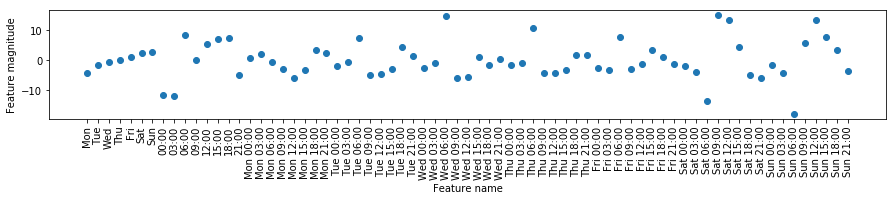

In [131]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature name")
plt.ylabel("Feature magnitude")